# `pseudo_electrostatic_packing`
This is a form of random sequential addition (`rsa`) where spheres are inserted as close to the specified points as possible without overlapping.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect

The arguments and their defaults for this function are:

In [2]:
inspect.signature(ps.generators.pseudo_electrostatic_packing)

<Signature (im, r, sites=None, clearance=0, protrusion=0, edges='extended', maxiter=1000)>

## `im`
The image into which the spheres should be inserted.  Spheres will be inserted into the ``True`` locations, as if these  indicate void space.

  0%|          | 0/100 [00:00<?, ?it/s]

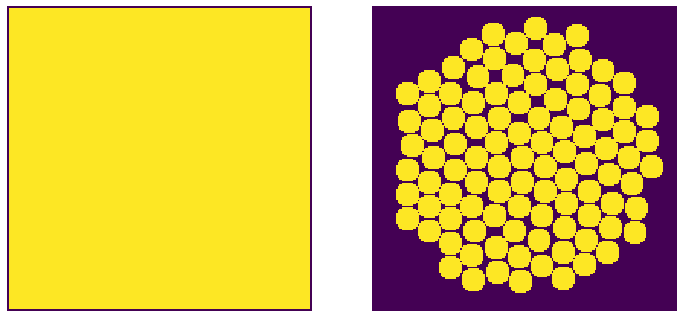

In [3]:
im = ~ps.generators.borders(shape=[200, 200], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=8, maxiter=100)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);

## `sites`
A boolean array with ``True`` values indicating the point where shperes should be clustered.  If not given, the function performs a distance transform of the image and uses all peaks.

  0%|          | 0/100 [00:00<?, ?it/s]

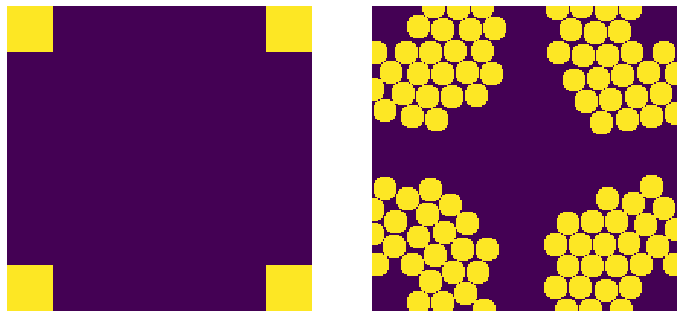

In [4]:
sites = ps.generators.borders(shape=[200, 200], mode='corners', thickness=30)
im = np.ones_like(sites, dtype=bool)
packing = ps.generators.pseudo_electrostatic_packing(im=im, sites=sites, r=8, maxiter=100)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(sites, interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);

## `r`
The radius of the spheres to add:

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

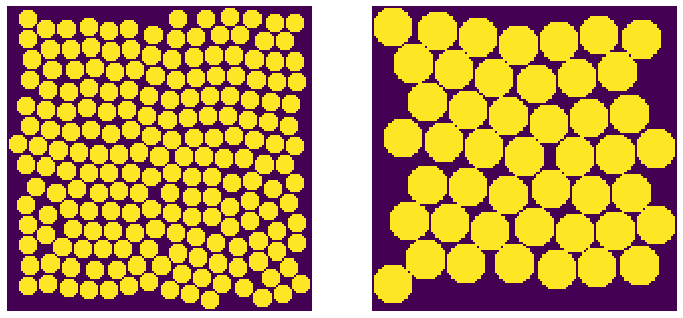

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

r = 5
im = ~ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)

r = 10
im = ~ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);

## `clearance`
The spheres can be forced to have some spacing between them by setting ``clearance > 0``, or they can overlap if ``clearance < 0``:

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

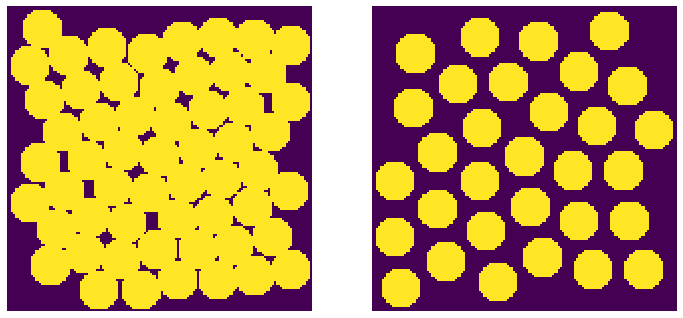

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

im = ~ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r, clearance=-2)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)

im = ~ps.generators.borders(shape=[151, 151], mode='faces')
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=r, clearance=5)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);

## `protrusion` 
One of the uses of this function is to insert spheres like carbon particles into a matrix, like polymer.  In these cases it may be desirable to have the spheres protrude slightly.

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

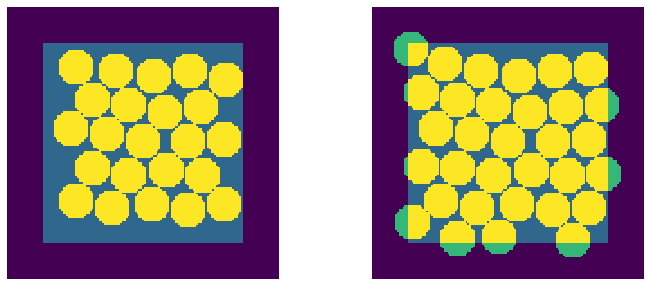

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])

im = ~ps.generators.borders(shape=[151, 151], mode='faces', thickness=20)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, protrusion=0)
ax[0].imshow(packing + 0.5*im, interpolation='none', origin='lower')
ax[0].axis(False)

im = ~ps.generators.borders(shape=[151, 151], mode='faces', thickness=20)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, protrusion=8)
ax[1].imshow(packing + 0.5*im, interpolation='none', origin='lower')
ax[1].axis(False);

## `maxiter`
The maximum number of spheres to add.  Limiting this number can ensure the process does not take too long if the image is large, as well allow for partial filling of the image.

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

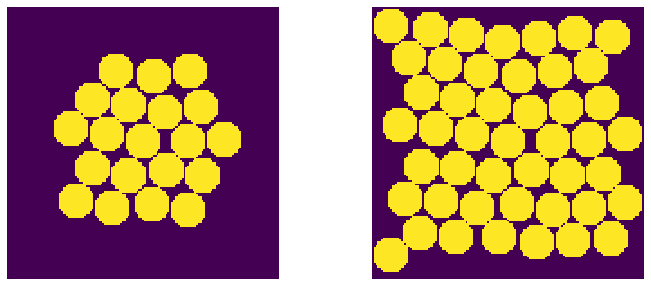

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])

im = ~ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, maxiter=20)
ax[0].imshow(packing, interpolation='none', origin='lower')
ax[0].axis(False)

im = ~ps.generators.borders(shape=[151, 151], mode='faces', thickness=1)
packing = ps.generators.pseudo_electrostatic_packing(im=im, r=10, maxiter=200)
ax[1].imshow(packing, interpolation='none', origin='lower')
ax[1].axis(False);